## Import libraries. Load dataset.

In [190]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

In [191]:
stacked = pd.read_csv("C:/Users/chris/Documents/Datasets/MTG Art Colors/stacked.csv")

## Group values and color. Drop all but the top 6 most prevalent colors. Add column for Prevalency Score (percentage of maximum).

In [192]:
stacked_top = stacked.groupby(["variable"]).sum().sort_values(["value"], ascending=False).head(6).reset_index()

In [193]:
stacked_top["prevalency_score"] = round(stacked_top["value"]/stacked_top.value.values.max(), 2)
stacked_top

,variable,value,prevalency_score
0,darkolivegreen,1130,1.00
1,sienna,1109,0.98
2,rosybrown,1103,0.98
3,indianred,899,0.80
4,peru,788,0.70
5,tan,704,0.62


In [194]:
color_totals = {}
for index,row in stacked_top.iterrows():
    color_totals[row["variable"]] = row["value"]
color_totals

{'darkolivegreen': 1130,
 'sienna': 1109,
 'rosybrown': 1103,
 'indianred': 899,
 'peru': 788,
 'tan': 704}

In [195]:
top_colors = list(stacked_top.variable.values)
top_colors

['darkolivegreen', 'sienna', 'rosybrown', 'indianred', 'peru', 'tan']

In [196]:
stacked = stacked[(stacked["variable"].isin(top_colors))]
stacked.head()

,colorIdentity,variable,value
18,B,peru,57
19,C,peru,111
20,G,peru,57
21,R,peru,226
22,U,peru,237


In [197]:
percentage_col = []
for index,row in stacked.iterrows():
    percentage_col.append(row["value"]/color_totals[row["variable"]])
stacked["percentage_col"] = percentage_col
stacked.head()

,colorIdentity,variable,value,percentage_col
18,B,peru,57,0.072335
19,C,peru,111,0.140863
20,G,peru,57,0.072335
21,R,peru,226,0.286802
22,U,peru,237,0.300761


## Create Pie Chart in Plotly showing distribution of colors.

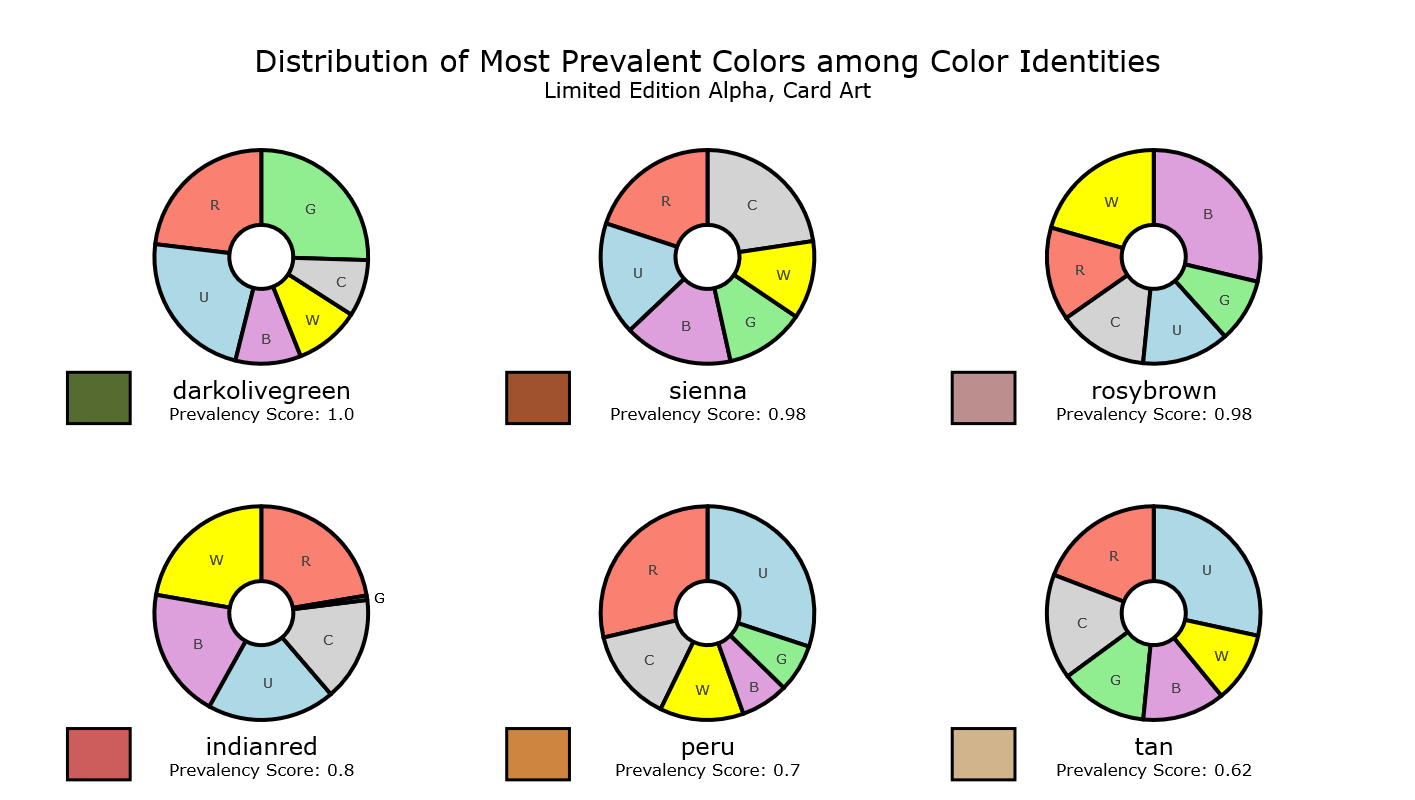

In [198]:
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
colors = ["plum", "lightgray", "lightgreen", "salmon", "lightblue", "yellow"]
titles = []
for index,i in enumerate(top_colors):
    titles.append(f"{i}<br><sup>Prevalency Score: {list(stacked_top.prevalency_score.values)[index]}</sup>")

fig = go.Figure()
fig = make_subplots(rows=2, cols=3, 
                    specs=specs, 
                    subplot_titles=titles)

labels = stacked[(stacked["variable"] == "darkolivegreen")].colorIdentity.to_list()
values = stacked[(stacked["variable"] == "darkolivegreen")].value.to_list()
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.3), 1, 1)

labels = stacked[(stacked["variable"] == "sienna")].colorIdentity.to_list()
values = stacked[(stacked["variable"] == "sienna")].value.to_list()
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.3), 1, 2)

labels = stacked[(stacked["variable"] == "rosybrown")].colorIdentity.to_list()
values = stacked[(stacked["variable"] == "rosybrown")].value.to_list()
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.3), 1, 3)

labels = stacked[(stacked["variable"] == "indianred")].colorIdentity.to_list()
values = stacked[(stacked["variable"] == "indianred")].value.to_list()
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.3), 2, 1)

labels = stacked[(stacked["variable"] == "peru")].colorIdentity.to_list()
values = stacked[(stacked["variable"] == "peru")].value.to_list()
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.3), 2, 2)

labels = stacked[(stacked["variable"] == "tan")].colorIdentity.to_list()
values = stacked[(stacked["variable"] == "tan")].value.to_list()
fig.add_trace(go.Pie(labels=labels, values=values, hole=0.3), 2, 3)

fig.update_traces(textinfo="label", 
                  textfont_size=14,
                  textposition="auto",
                  marker=dict(colors=colors, line=dict(color="black", width=4)),
                  showlegend = False)
fig.update_layout(title_text=f"Distribution of Most Prevalent Colors among Color Identities<br><sup>Limited Edition Alpha, Card Art</sup>",
                  title_font_size=30,
                  title_x=0.5,
                  title_y=.91,
                  font=dict(size=18,color="black"),    
                  margin=dict(t=150),
                  width=1200,
                  height=800,
                  shapes=[dict(type="rect", x0=-0.01, x1=0.04, y0=.52, y1=0.61, fillcolor="darkolivegreen", line=dict(color="black", width=3)),
                          dict(type="rect", x0=0.34, x1=0.39, y0=0.52, y1=0.61, fillcolor="sienna", line=dict(color="black", width=3)),
                          dict(type="rect", x0=0.695, x1=0.745, y0=0.52, y1=0.61, fillcolor="rosybrown", line=dict(color="black", width=3)),
                          dict(type="rect", x0=-0.01, x1=0.04, y0=-0.105, y1=-0.015, fillcolor="indianred", line=dict(color="black", width=3)),
                          dict(type="rect", x0=0.34, x1=0.39, y0=-0.105, y1=-0.015, fillcolor="peru", line=dict(color="black", width=3)),
                          dict(type="rect", x0=0.695, x1=0.745, y0=-0.105, y1=-0.015, fillcolor="tan", line=dict(color="black", width=3))])
fig.layout.annotations[0].update(y=0.495, font=dict(size = 24))
fig.layout.annotations[1].update(y=0.495, font=dict(size = 24))
fig.layout.annotations[2].update(y=0.495, font=dict(size = 24))
fig.layout.annotations[3].update(y=-0.13, font=dict(size = 24))
fig.layout.annotations[4].update(y=-0.13, font=dict(size = 24))
fig.layout.annotations[5].update(y=-0.13, font=dict(size = 24))
fig.show()

## Plot the same data using a horizontal stacked bar chart.

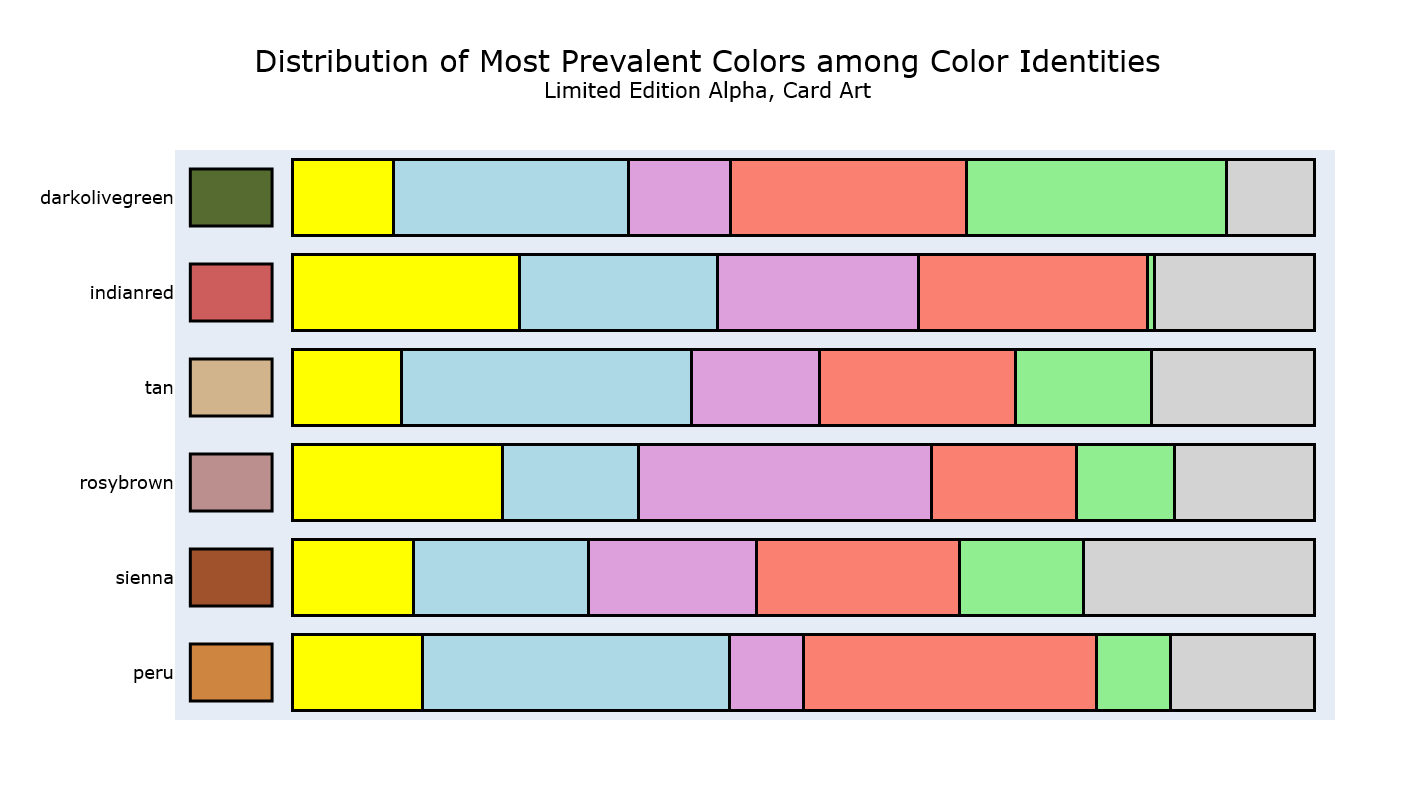

In [199]:
colors = ["yellow", "lightblue", "plum", "salmon", "lightgreen", "lightgray"]
colorIdentities = ["W", "U", "B", "R", "G", "C"]

fig = go.Figure()

for index,i in enumerate(colors):
    fig.add_trace(go.Bar(y=list(stacked.variable.unique()), 
                         x=stacked[(stacked["colorIdentity"] == colorIdentities[index])].percentage_col.to_list(), 
                         orientation="h", 
                         marker=dict(color=colors[index], line=dict(color="black", width=3)),
                         hovertemplate = "%{x}",
                         showlegend=False,
                         name=colorIdentities[index]))

fig.update_layout(title_text=f"Distribution of Most Prevalent Colors among Color Identities<br><sup>Limited Edition Alpha, Card Art</sup>",
                  title_font_size=30,
                  title_x=0.5,
                  title_y=.91,
                  yaxis=dict(ticklabelposition="outside left", showgrid=False, zeroline=False),
                  xaxis=dict(range=[-0.115,1.02], showgrid=False, zeroline=False, showticklabels=False),
                  barmode="stack",
                  font=dict(size=18,color="black"),    
                  margin=dict(t=150, l=175),
                  width=1200,
                  height=800,
                  shapes=[dict(type="rect", xref="x", yref="y", x0=-0.1, x1=-0.02, y0=4.7, y1=5.3, fillcolor="darkolivegreen", line=dict(color="black", width=3)),
                          dict(type="rect", xref="x", yref="y", x0=-0.1, x1=-0.02, y0=3.7, y1=4.3, fillcolor="indianred", line=dict(color="black", width=3)),
                          dict(type="rect", xref="x", yref="y", x0=-0.1, x1=-0.02, y0=2.7, y1=3.3, fillcolor="tan", line=dict(color="black", width=3)),
                          dict(type="rect", xref="x", yref="y", x0=-0.1, x1=-0.02, y0=1.7, y1=2.3, fillcolor="rosybrown", line=dict(color="black", width=3)),
                          dict(type="rect", xref="x", yref="y", x0=-0.1, x1=-0.02, y0=0.7, y1=1.3, fillcolor="sienna", line=dict(color="black", width=3)),
                          dict(type="rect", xref="x", yref="y", x0=-0.1, x1=-0.02, y0=-0.3, y1=0.3, fillcolor="peru", line=dict(color="black", width=3))])
fig.show()